# Image Thresholding

Thresholding is a type of Image Segmentation in which segment the image into the foreground and background.In the foreground, we have an object of interest and in the background except an object of interest. Separating the regions corresponding to the objet of interest and background is useful in many computer vision application. Binary masks for an image is genereated using the thresholding process.The primary goal of thresholding is to convert a grayscale or color image into a binary image, where each pixel is classified as either foreground (object) or background (non-object) based on a specified threshold value. 


## Simple Thresholding ( Global Thresholding)

A single threshold value is applied to the entire image.If the image has a bimodal histogram, you can segment an image into the foreground and background using one threshold value. This process is called global thresholding.Pixels with intensity values greater than or equal to the threshold are classified as foreground, while pixels with intensity values below the threshold are classified as background.

### Types of Simple Thresholding 

1. Threshold Binary
2. Threshold Binary,Inverted
3. Truncate
4. Threshold to Zero
5. Threshold to Zero, Inverted

#### 1. Threshold Binary

If the intensity of the pixel src(x,y) is higher than thresh, then the new pixel intensity is set to a MaxVal. Otherwise, the pixels are set to 0.

#### 2. Threshold Binary,Inverted

If the intensity of the pixel src(x,y) is higher than thresh, then the new pixel intensity is set to a 0. Otherwise, it is set to MaxVal.

#### 3. Truncate

The maximum intensity value for the pixels is thresh, if src(x,y) is greater, then its value is truncated. 

#### 4. Threshold to Zero

If src(x,y) is lower than thresh, the new pixel value will be set to 0.

#### 5. Threshold to Zero, Inverted

If src(x,y) is greater than thresh, the new pixel value will be set to 0.



In [3]:
# Importing Important Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

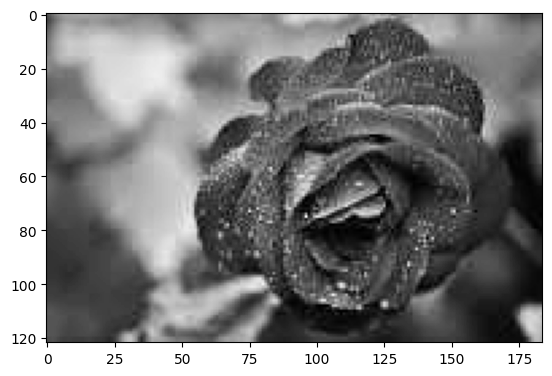

In [10]:
# Load Images
image = cv2.imread('../dataset/flowers.jpeg',0)
plt.imshow(image,cmap = 'gray')

In [11]:
# constat values of pixel that is 0-256
min_value  = 0
max_value = 256

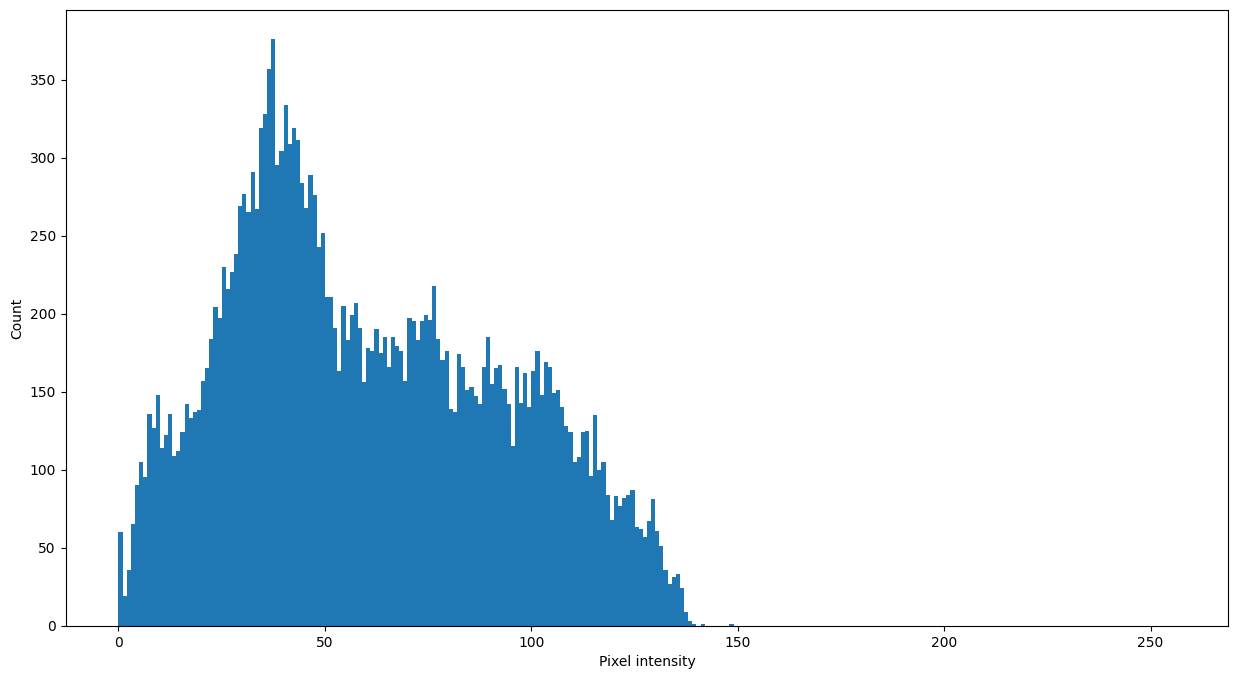

In [13]:
# Plotting Histogram
plt.figure(figsize=(15,8))
plt.hist(image.ravel(),max_value,[min_value,max_value])
plt.xlabel("Pixel intensity")
plt.ylabel("Count")
plt.show()



In [25]:
# gloabl Threshold value
global_thres = 70

In [26]:
# global thresholding
ret,THRESH_BINARY       = cv2.threshold(image, global_thres, max_value, cv2.THRESH_BINARY)
ret,THRESH_BINARY_INV   = cv2.threshold(image, global_thres, max_value, cv2.THRESH_BINARY_INV)
ret,THRESH_TRUNC        = cv2.threshold(image, global_thres, max_value, cv2.THRESH_TRUNC)
ret,THRESH_TOZERO       = cv2.threshold(image, global_thres, max_value, cv2.THRESH_TOZERO)
ret,THRESH_TOZERO_INV   = cv2.threshold(image, global_thres, max_value, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','THRESH_BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV'] 
images = [image, THRESH_BINARY, THRESH_BINARY_INV, THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INV] 

IndexError: list index out of range

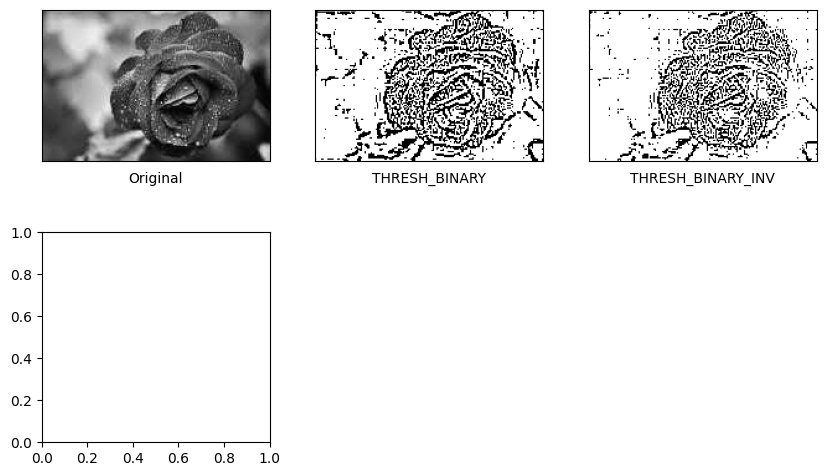

In [47]:
# Plotting images
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray') # plot images in list
    plt.xlabel(titles[i])
    plt.xticks([]),plt.yticks([])
# plt.savefig("globalthreshold.PNG")
plt.show()

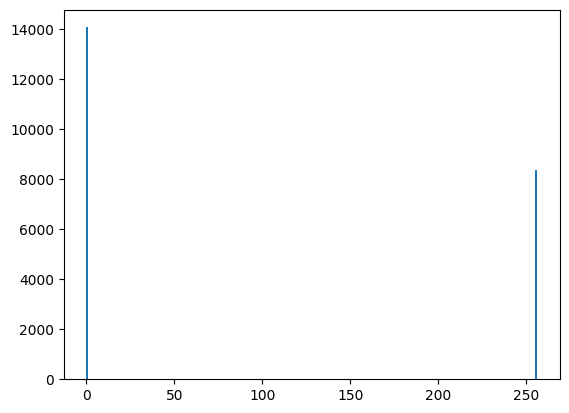

In [29]:
plt.hist(THRESH_BINARY.ravel(),max_value,[min_value,max_value])
plt.show()



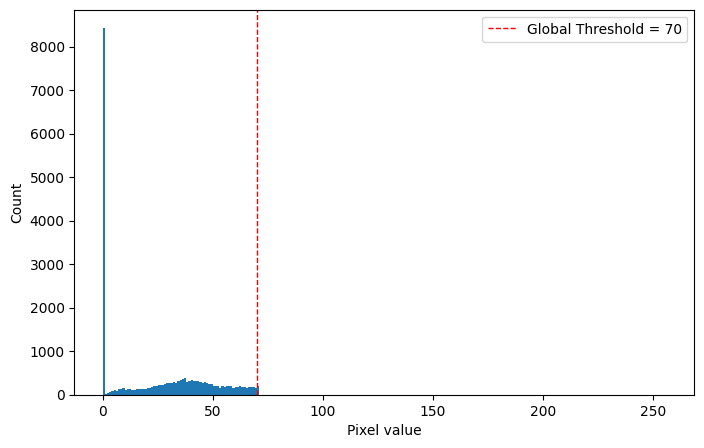

In [31]:
# plotting histogram
plt.figure(figsize=(8,5))
plt.hist(THRESH_TOZERO_INV.ravel(),max_value,[min_value,max_value])
plt.axvline(x=70, color='r', linestyle='dashed', linewidth=1,label="Global Threshold" + " = " + str(global_thres))
plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.legend()
plt.show()

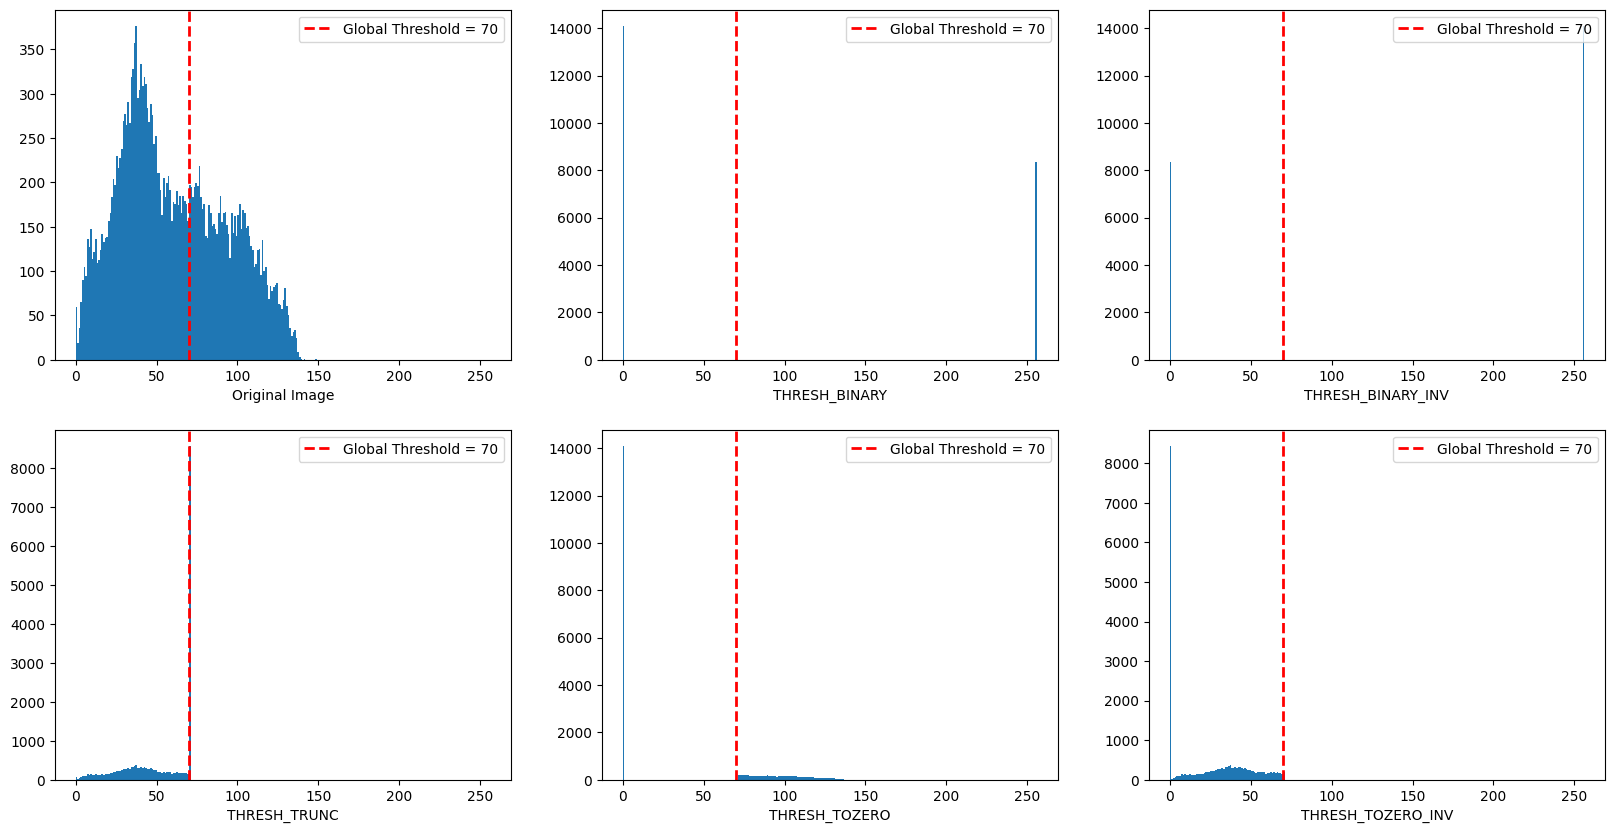

In [32]:
# plotting histogram for all global threshold
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(images[i].ravel(),max_value,[min_value,max_value])
    plt.axvline(x=global_thres, color='r', linestyle='dashed', linewidth=2,\
                label="Global Threshold" + " = " + str(global_thres))
    plt.xlabel(titles[i])
    plt.xticks(),plt.yticks() # ticks dekhaune 
    plt.legend()
plt.show()
plt.close()



1. cv2.THRESH_BINARY: Creates a binary image where a value below the threshold is 0, and the above threshold is 255.
2. cv2.THRESH_BINARY_INV: It is inverse of THRESH_BINARY value below threshold = 255, value above threshold =0
3. cv2.THRESH_TRUNC: Values smaller than the threshold value are unchanged, but any value larger than the threshold is set to a defined threshold value.
4. cv2.THRESH_TOZERO: Pixel values lower then the threshold value are set to the 0, and value above the threshold is unchanged.
5. cv2.THRESH_TOZERO_INV: Pixel values smaller than the threshold value are fixed, and the value above a threshold is set to 0.



### Adaptive Thresholding(Local Thresholding)

Adaptive thresholding is an image processing technique that addresses the limitations of global thresholding, especially in cases where the illumination and contrast vary significantly across different parts of an image. Unlike global thresholding, which applies a single threshold to the entire image, adaptive thresholding calculates a threshold value for each pixel based on the local neighborhood around that pixel. 

For each pixel in the image threshold value, it calculated. If the pixel value is below the threshold, then it is set to the background value; otherwise, it assumes the foreground value.
The size of the neighborhood has to be large enough to cover sufficient foreground and background pixels, otherwise a poor threshold is chosen. On the other hand, choosing regions which are too large can violate the assumption of approximately uniform illumination.

1. Cv2.ADAPTIVE_THRESH_MEAN_C : Threshold = mean of the neighborhood area.
2. Cv2.ADAPTIVE_THRESH_GAUSSIAN_C : Threshold = weighted sum of neighborhood values where weights are in gaussian window.




In [33]:
# constant
block_size = 5
C = 2.5

In [35]:
# Adaptive thresholding
a_thres_mean    =   cv2.adaptiveThreshold(image, max_value, cv2.ADAPTIVE_THRESH_MEAN_C,     cv2.THRESH_BINARY,  block_size,C)
a_thres_gauss   =   cv2.adaptiveThreshold(image, max_value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size,C)


In [36]:
image[0:5, 0:5]

array([[49, 56, 66, 75, 82],
       [41, 48, 58, 68, 75],
       [37, 44, 54, 64, 72],
       [40, 47, 58, 68, 77],
       [46, 53, 64, 74, 83]], dtype=uint8)

In [37]:
np.mean(image[1:5, 1:5])

62.9375

In [38]:
a_thres_mean[0:5, 0:5]

array([[255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255],
       [  0,   0,   0,   0,   0],
       [  0,   0, 255, 255, 255],
       [  0,   0, 255, 255, 255]], dtype=uint8)

In [39]:
a_thres_gauss

array([[255, 255, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

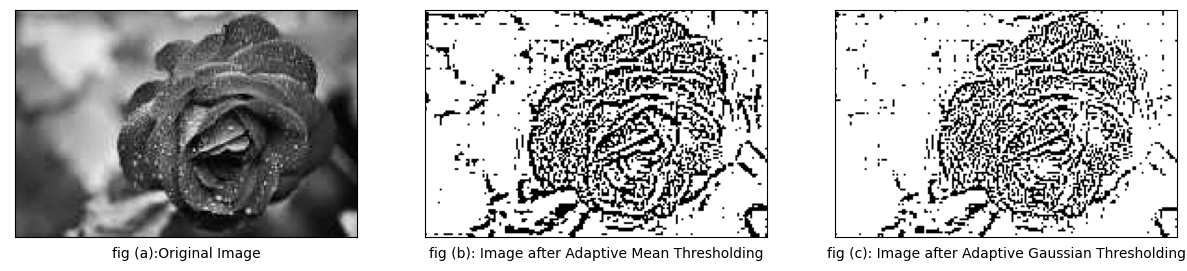

In [40]:
titles = ['fig (a):Original Image',
            'fig (b): Image after Adaptive Mean Thresholding', 'fig (c): Image after Adaptive Gaussian Thresholding']
images = [image, a_thres_mean, a_thres_gauss]
plt.figure(figsize=(15,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray')
    plt.xlabel(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



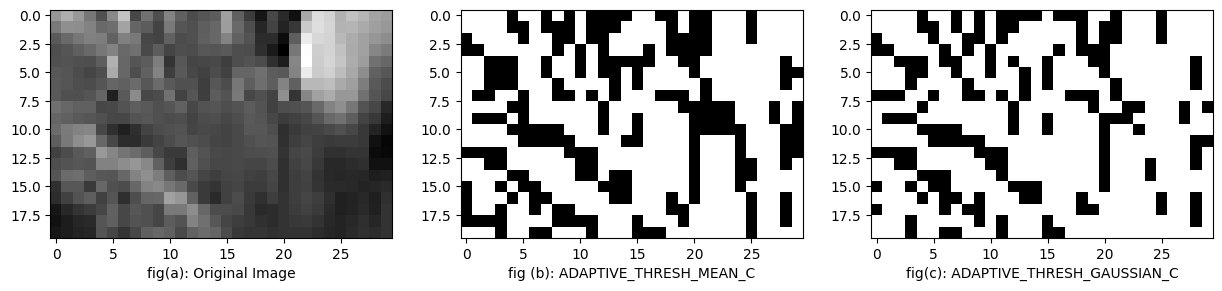

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].imshow(image[40:60, 140:170], cmap='gray')
axes[0].set_xlabel('fig(a): Original Image')
axes[1].imshow(a_thres_mean[40:60, 140:170], cmap='gray')
axes[1].set_xlabel('fig (b): ADAPTIVE_THRESH_MEAN_C')
axes[2].imshow(a_thres_gauss[40:60, 140:170], cmap='gray')
axes[2].set_xlabel('fig(c): ADAPTIVE_THRESH_GAUSSIAN_C')
plt.savefig("adaptive_compare.png")
plt.show()
plt.close()



### Otsu's Binarization


 In the global threshold, you chose a value that separates two modes(middle). Is it always optimal?
- No, it is not always optimal.


In OTSU binarization, a threshold value for a bimodal image is calculated automatically from the image histogram. 

The method is optimal because it maximizes the between-class variance. Between-class variance is a well known measure in discriminant analysis.

The basic idea is that properly thresholded classes should be distinct with respect to the intensity values of their pixels and, conversely, that a threshold giving the best separation between classes in terms of their intensity values would be the best (optimum) threshold.
 is widely used to separate an image into two classes: foreground and background, by finding an optimal threshold that minimizes intra-class variance.

In order to do so, the cv.threshold() function is used, where cv.THRESH_OTSU is passed as an extra flag. The threshold value can be chosen arbitrary. The algorithm then finds the optimal threshold value which is returned as the first output.





In [44]:
ret, otsu_bin = cv2.threshold(image, min_value, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, otsu_binverse = cv2.threshold(image, min_value, max_value, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
ret, otsu_tozero = cv2.threshold(image, min_value, max_value, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
ret, otsu_tozeroinv = cv2.threshold(image, min_value, max_value, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, otsu_totrunc = cv2.threshold(image, min_value, max_value, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )

output = [image, otsu_bin, otsu_binverse, otsu_tozero, otsu_tozeroinv, otsu_totrunc]

titles = ['Original', 'THRESH_BINARY', 'THRESH_BINARY_INV',
            'THRESH_TOZERO', 'THRESH_TOZERO_INV', 'THRESH_TRUNC']



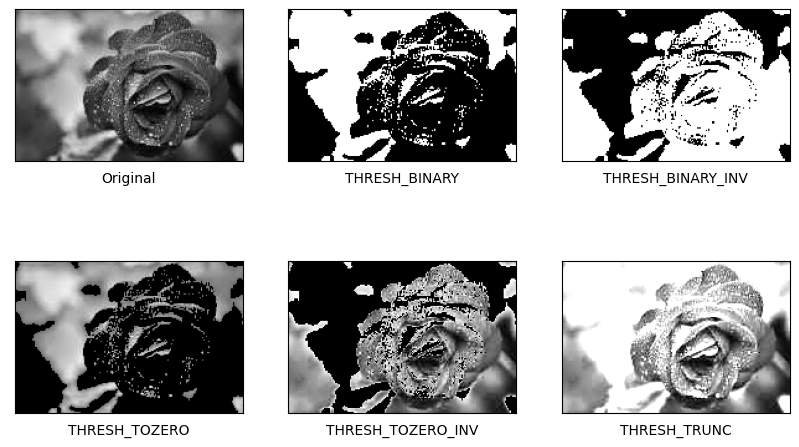

In [45]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.xlabel(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()  

